In [25]:
import xarray as xr, pandas as pd, geopandas as gpd
from pathlib import Path


In [26]:
pth = Path(r'C:\Users\Myles.McManus\Documents\Working\temp')
# ds_a = pth/'test.h5'
ds_a =r"C:\Users\Myles.McManus\Documents\Working\temp\cc100yrEllipse.tin"
outFileName = "\\"+str(ds_a).split('\\')[-1].split('.')[0]+'.gpkg'
outFileName = str(pth)+outFileName
print(outFileName)

ds_a = xr.open_dataset(ds_a)
ds_a
# h.close

C:\Users\Myles.McManus\Documents\Working\temp\cc100yrEllipse.gpkg


C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


<xarray.Dataset>
Dimensions:      (phony_dim_0: 1369, phony_dim_1: 1, phony_dim_2: 2)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2
Data variables:
    PRECIP       (phony_dim_0, phony_dim_1) float32 ...
    Projection   (phony_dim_1) object ...
    Status       (phony_dim_0) object ...
    TIN_points   (phony_dim_0, phony_dim_2) float32 ...
    time         (phony_dim_1) datetime64[ns] ...
    time_bounds  (phony_dim_2, phony_dim_1) int32 ...
    x_y          (phony_dim_2) object ...

In [27]:
pts = ds_a['TIN_points'].to_dataframe()
pts

TIN_points
phony_dim_0 phony_dim_2            
0           0              0.000000
            1             -0.000234
1           0              2.786196
            1              0.440940
2           0              2.760134
...                             ...
1366        1             10.684243
1367        0            214.914001
            1             18.683155
1368        0            216.188568
            1             26.539150

[2738 rows x 1 columns]

In [28]:
pts = pts.sort_index().reset_index()
pts

,phony_dim_0,phony_dim_2,TIN_points
0,0,0,0.000000
1,0,1,-0.000234
2,1,0,2.786196
3,1,1,0.440940
4,2,0,2.760134
...,...,...,...
2733,1366,1,10.684243
2734,1367,0,214.914001
2735,1367,1,18.683155
2736,1368,0,216.188568


In [29]:
pts= pts.rename(columns={'phony_dim_0':'i','phony_dim_2':'ax'})
pts

,i,ax,TIN_points
0,0,0,0.000000
1,0,1,-0.000234
2,1,0,2.786196
3,1,1,0.440940
4,2,0,2.760134
...,...,...,...
2733,1366,1,10.684243
2734,1367,0,214.914001
2735,1367,1,18.683155
2736,1368,0,216.188568


In [30]:
pts['ax']=pts['ax'].replace({0:'x',1:'y'})
pts

,i,ax,TIN_points
0,0,x,0.000000
1,0,y,-0.000234
2,1,x,2.786196
3,1,y,0.440940
4,2,x,2.760134
...,...,...,...
2733,1366,y,10.684243
2734,1367,x,214.914001
2735,1367,y,18.683155
2736,1368,x,216.188568


In [31]:
pts = pts.pivot_table('TIN_points',columns='ax',index='i')
pts

ax,x,y
i,,
0,0.000000,-0.000234
1,2.786196,0.440940
2,2.760134,0.537252
3,2.713142,0.628594
4,2.645559,0.714343
...,...,...
1364,201.377502,-5.493777
1365,207.480225,2.605175
1366,212.003891,10.684243


In [32]:
pts['y'] = pts['y'] + ds_a.Projection.latitude_of_projection_origin
pts['x'] = pts['x'] + ds_a.Projection.longitude_of_projection_origin
pts

ax,x,y
i,,
0,-95.198082,29.570131
1,-92.411888,30.011305
2,-92.437950,30.107618
3,-92.484940,30.198959
4,-92.552521,30.284708
...,...,...
1364,106.179420,24.076590
1365,112.282143,32.175541
1366,116.805809,40.254608


In [33]:
if ds_a.PRECIP.any():
    print('PRECIP is the var name')
    precipStr = 'PRECIP'
    precip = ds_a.PRECIP.to_dataframe()
elif ds_a.precip.any():
    precip = ds_a.precip.to_dataframe()
    precipStr = 'precip'
    print('precip is the var name')
precip

PRECIP is the var name


,,PRECIP
phony_dim_0,phony_dim_1,
0,0,53.756687
1,0,53.756687
2,0,53.756687
3,0,53.756687
4,0,53.756687
...,...,...
1364,0,0.000000
1365,0,0.000000
1366,0,0.000000


In [34]:
precip.reset_index().phony_dim_0.unique()

array([   0,    1,    2, ..., 1366, 1367, 1368], dtype=int64)

In [35]:
precip = precip.reset_index().rename(columns={'phony_dim_0':'i'}).drop('phony_dim_1',1).set_index('i')
precip

,PRECIP
i,
0,53.756687
1,53.756687
2,53.756687
3,53.756687
4,53.756687
...,...
1364,0.000000
1365,0.000000
1366,0.000000


In [36]:
precip = pts.join(precip)
precip

,x,y,PRECIP
i,,,
0,-95.198082,29.570131,53.756687
1,-92.411888,30.011305,53.756687
2,-92.437950,30.107618,53.756687
3,-92.484940,30.198959,53.756687
4,-92.552521,30.284708,53.756687
...,...,...,...
1364,106.179420,24.076590,0.000000
1365,112.282143,32.175541,0.000000
1366,116.805809,40.254608,0.000000


In [37]:
precip = precip[precip.PRECIP >= 5]
precip

,x,y,PRECIP
i,,,
0,-95.198082,29.570131,53.756687
1,-92.411888,30.011305,53.756687
2,-92.437950,30.107618,53.756687
3,-92.484940,30.198959,53.756687
4,-92.552521,30.284708,53.756687
...,...,...,...
1004,-28.916634,27.761942,5.850607
1005,-26.908043,30.428246,5.850607
1006,-25.419121,33.087093,5.850607


In [38]:
precip.to_csv('out.csv')

In [39]:
gdf = gpd.GeoDataFrame(precip[[precipStr]], geometry=gpd.points_from_xy(precip.x,precip.y),crs=ds_a.Projection.wkt)
# gdf = gpd.GeoDataFrame(precip[[precipStr]], geometry=gpd.points_from_xy(precip.x,precip.y))
gdf

,PRECIP,geometry
i,,
0,53.756687,POINT (-95.19808 29.57013)
1,53.756687,POINT (-92.41189 30.01130)
2,53.756687,POINT (-92.43795 30.10762)
3,53.756687,POINT (-92.48494 30.19896)
4,53.756687,POINT (-92.55252 30.28471)
...,...,...
1004,5.850607,POINT (-28.91663 27.76194)
1005,5.850607,POINT (-26.90804 30.42825)
1006,5.850607,POINT (-25.41912 33.08709)


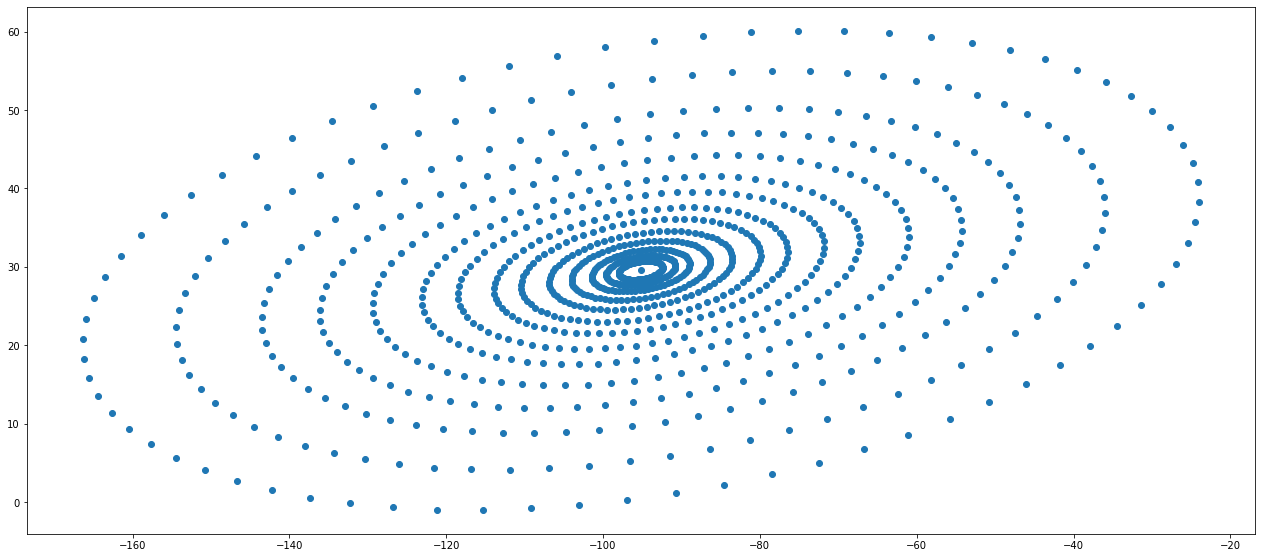

In [40]:

gdf.plot()

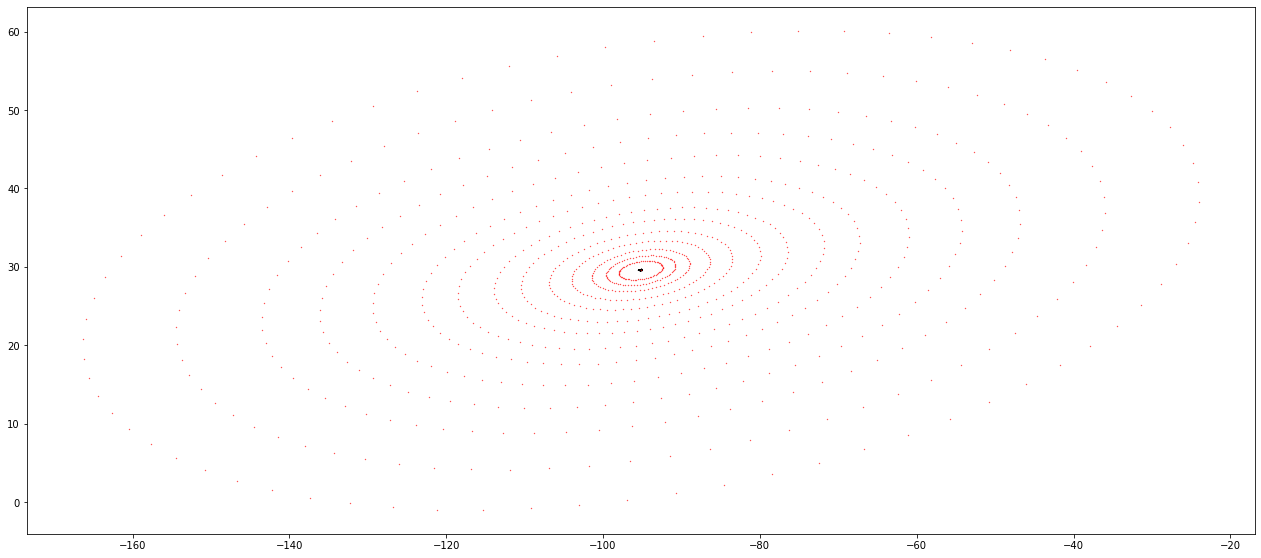

In [41]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=22,22

# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(r"C:\js\FloodMap\public\map\WatershedBoundaryPolygons\Clear Creek.geojson")
base = world.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=0.1)
# base.plot(ax=gdf, marker='o', color='red', markersize=0.1)

In [42]:
gdf.to_file(outFileName,driver='GPKG')

In [43]:
if gdf.PRECIP.any():
    gdf.PRECIP.describe()
elif gdf.Precip.any():
    gdf.Precip.describe()

In [44]:
ds_a.close

<bound method DataWithCoords.close of <xarray.Dataset>
Dimensions:      (phony_dim_0: 1369, phony_dim_1: 1, phony_dim_2: 2)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2
Data variables:
    PRECIP       (phony_dim_0, phony_dim_1) float32 53.76 53.76 ... 0.0 0.0
    Projection   (phony_dim_1) object 'AlbersEqualArea'
    Status       (phony_dim_0) object 'Active' 'Active' ... 'Active' 'Active'
    TIN_points   (phony_dim_0, phony_dim_2) float32 0.0 -0.000234 ... 26.54
    time         (phony_dim_1) datetime64[ns] 2000-01-01
    time_bounds  (phony_dim_2, phony_dim_1) int32 946706400 946965600
    x_y          (phony_dim_2) object 'x' 'y'>